In [4]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import Markdown as md
from ipynb.fs.full import functions
import pandas as pd

InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
ticker_prices_filename = 'ticker_prices_transformed.xlsx'
ticker_prices_excel_book = pd.read_excel(io=ticker_prices_filename, header=[0,1], index_col=0, sheet_name=None)

market_prices_filename = 'market_prices_transformed.xlsx'
market_prices_excel_book = pd.read_excel(io=market_prices_filename, index_col=0, sheet_name=None)

formation_filename = 'output_formation.xlsx'
formation_excel_book = pd.read_excel(io=formation_filename, header=[0,1], index_col=0, sheet_name=None)

,car_winner,car_loser
period,,
1,0.007675,0.003222
2,0.017823,0.002298
3,0.016121,0.005661
4,0.015814,-0.000001
5,0.021181,-0.001837
6,0.020754,-0.001677
7,0.026883,-0.004720
8,0.040897,-0.005381
9,0.038497,-0.007099


,car_winner,car_loser
period,,
1,-0.003131,0.005701
2,-0.003322,0.010806
3,-0.008106,0.018421
4,-0.009259,0.018960
5,-0.001981,0.021476
6,0.002191,0.029089
7,0.000625,0.030913
8,-0.006484,0.026838
9,-0.004501,0.037873


,car_winner,car_loser
period,,
1,-0.002876,-0.003437
2,-0.000089,0.008449
3,-0.006205,-0.000470
4,0.000237,-0.001074
5,-0.005413,-0.014888
6,0.000905,-0.010873
7,-0.000387,-0.019501
8,-0.003585,-0.024293
9,0.003237,-0.025418


,car_winner,car_loser
period,,
1,-0.005951,0.015104
2,-0.001035,0.020306
3,-0.000555,0.016702
4,-0.010332,0.003439
5,-0.012053,0.004826
6,-0.012826,0.002387
7,-0.009532,0.000817
8,-0.006989,0.007707
9,-0.007858,0.003532


,car_winner,car_loser
period,,
1,-0.006198,-0.002519
2,-0.011465,-0.004468
3,-0.025545,0.013517
4,-0.037249,0.013726
5,-0.032997,0.008525
6,-0.046171,0.004170
7,-0.048322,0.004875
8,-0.045818,0.000097
9,-0.037409,0.002049


,car_winner,car_loser
period,,
1,-0.010610,-0.005275
2,-0.025530,0.002913
3,-0.022356,-0.010033
4,-0.024300,0.012793
5,-0.037893,0.020288
6,-0.047309,0.016899
7,-0.063804,0.017795
8,-0.066595,0.008199
9,-0.075578,0.006958


,car_winner,car_loser
period,,
1,0.001666,0.119594
2,-0.006564,0.116784
3,-0.011639,0.113685
4,-0.010978,0.116459
5,-0.010974,0.114041
6,-0.014796,0.116884
7,-0.016170,0.103950
8,-0.009598,0.110830
9,-0.011637,0.104651


,car_winner,car_loser
period,,
1,-0.003166,0.000972
2,0.006838,0.014507
3,0.007184,0.016118
4,0.008090,0.025415
5,0.010910,0.030422
6,0.020524,0.031799
7,0.014359,0.031101
8,0.010987,0.030827
9,0.006804,0.032272


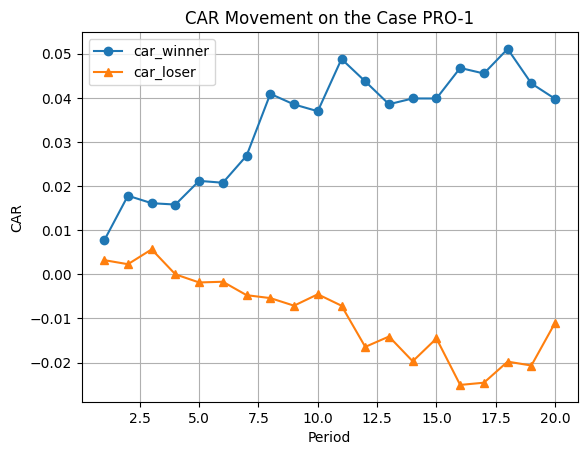

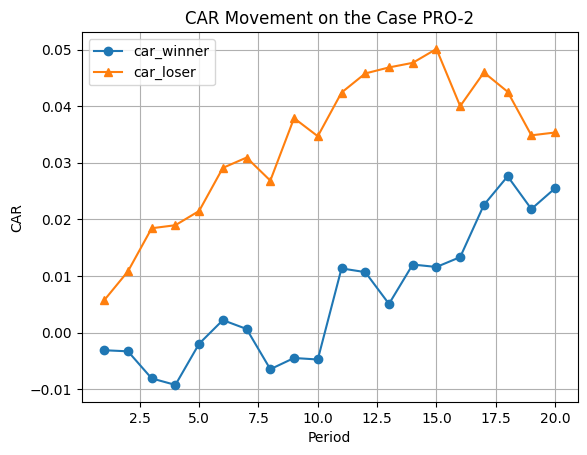

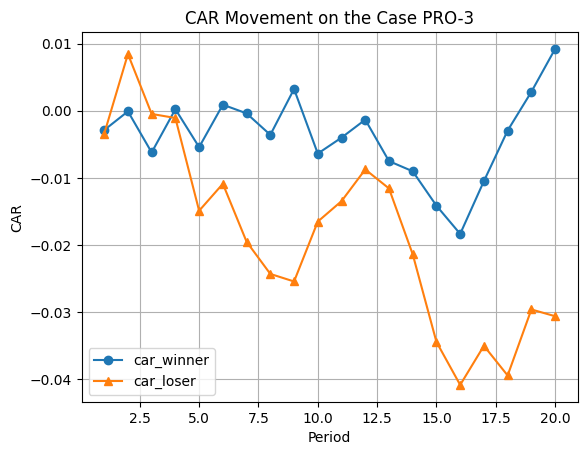

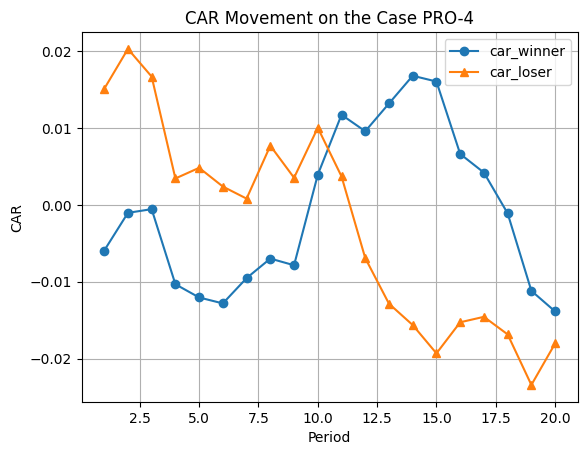

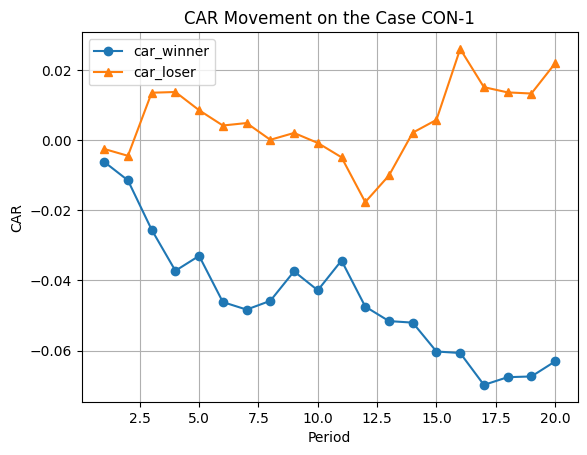

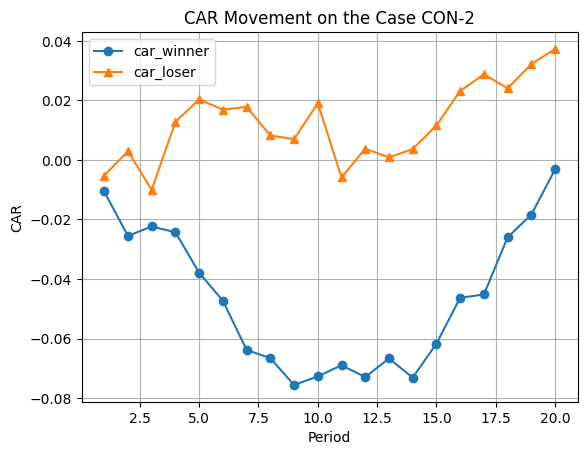

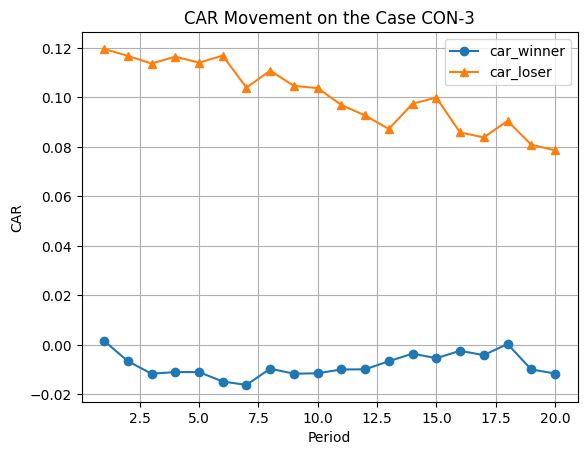

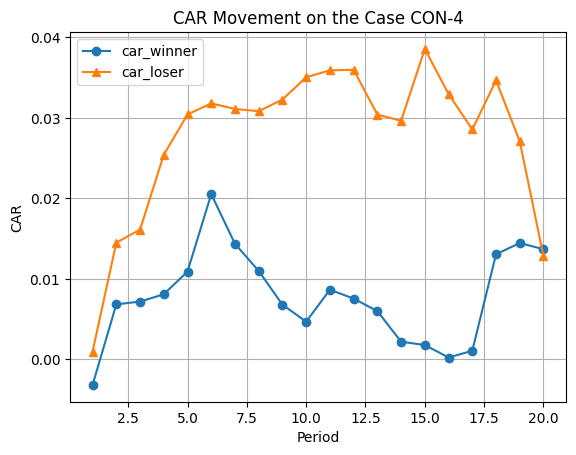

In [8]:
price_column_name = 'price'

first_period_of_price = 0
last_period_of_price = 20

for case in market_prices_excel_book.keys():
    formation_df = formation_excel_book[case]
    ticker_prices = ticker_prices_excel_book[case]

    factor = int(len(formation_df.columns.levels[0]) / 5)
    ticker_list = formation_df.columns.unique(level=0).to_list()
    winner_ticker_list = ticker_list[:factor]
    loser_ticker_list = ticker_list[-factor:]

    market_return = functions.calculate_market_return(market_price_df=market_prices_excel_book[case],
                                                        first_period_of_price=first_period_of_price, 
                                                        last_period_of_price=last_period_of_price)

    tickers_first_index = ticker_prices_excel_book[case].index.get_loc(first_period_of_price)
    tickers_last_index = ticker_prices_excel_book[case].index.get_loc(last_period_of_price)
    tickers_testing_prices = ticker_prices_excel_book[case].copy()[price_column_name].iloc[tickers_first_index:tickers_last_index+1]

    winner_ticker_prices = tickers_testing_prices[winner_ticker_list]
    loser_ticker_prices = tickers_testing_prices[loser_ticker_list]

    winner_ticker_return = winner_ticker_prices.copy().ffill().pct_change()[1:]
    loser_ticker_return = loser_ticker_prices.copy().ffill().pct_change()[1:]

    winner_observation_df = functions.init_observation_df(winner_ticker_return)
    loser_observation_df = functions.init_observation_df(loser_ticker_return)

    winner_observation_df = functions.calculate_u(winner_observation_df, market_return)
    loser_observation_df = functions.calculate_u(loser_observation_df, market_return)

    winner_obs_aggr_df = functions.generate_observation_aggregated_df(winner_observation_df)
    loser_obs_aggr_df = functions.generate_observation_aggregated_df(loser_observation_df)

    winner_loser_comparison = functions.generate_winner_loser_comparison(winner_obs_aggr_df=winner_obs_aggr_df, loser_obs_aggr_df=loser_obs_aggr_df)

    winner_loser_comparison
    functions.plot_car_winner_loser(winner_loser_comparison=winner_loser_comparison, case_code=case)